# Detailed Evaluation

This notebook shows how to produce some tables and plots for analysing results. This is meant as a starting point, because eah game will require a custom evaluation depending on its metrics and experiments.

This notebook uses the output files of evaluation/bencheval.py. Run that first.

In [1]:
import sys
# sys.path.append('..')

from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon

import evaluation.evalutils as utils
from evaluation.makingtables import build_dispersion_table
import clemgame.metrics as clemmetrics


      _                _                     _     
     | |              | |                   | |    
  ___| | ___ _ __ ___ | |__   ___ _ __   ___| |__  
 / __| |/ _ \ '_ ` _ \| '_ \ / _ \ '_ \ / __| '_ \ 
| (__| |  __/ | | | | | |_) |  __/ | | | (__| | | |
 \___|_|\___|_| |_| |_|_.__/ \___|_| |_|\___|_| |_|


Choose path for the .csv with the raw scores. This is created after running ```bencheval.py```.

In [2]:
RAW_PATH = Path('results/raw.csv')
# RAW_PATH = 'results/raw.csv'
# RAW_PATH = Path('\\results\\raw.csv')
raw_df = pd.read_csv(RAW_PATH, index_col=0)

Let's inspect the contents of ```data```:

In [3]:
raw_df

,game,model,experiment,episode,metric,value
0,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Violated Request Count,0.0
1,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Parsed Request Count,50.0
2,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Request Count,50.0
3,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Request Success Ratio,1.0
4,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,hallucination_count,0.0
...,...,...,...,...,...,...
33635,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_5,Played,0.0
33636,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_6,Played,0.0
33637,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_7,Played,0.0
33638,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_8,Played,0.0


If we want to evaluate a single game and the results directory contained more games, we can filter the game column:

In [4]:
game_df = raw_df[raw_df.game == 'adventuregame']
game_df

,game,model,experiment,episode,metric,value
0,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Violated Request Count,0.0
1,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Parsed Request Count,50.0
2,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Request Count,50.0
3,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,Request Success Ratio,1.0
4,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,hallucination_count,0.0
...,...,...,...,...,...,...
33635,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_5,Played,0.0
33636,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_6,Played,0.0
33637,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_7,Played,0.0
33638,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_8,Played,0.0


## Overview tables

Get dispersion metrics over all episodes. Note that we use groupby, which will ignore NaN values, according to the documentation!

In [5]:
stats_df = build_dispersion_table(['game', 'model', 'metric'], game_df) # could also use raw_df for results for all games
stats_df

mean   
game          model                                              metric                          
adventuregame LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefight... Aborted                   1.0  \
                                                                 Lose                      1.0   
                                                                 Main Score                0.0   
                                                                 Parsed Request Count      0.0   
                                                                 Played                    0.0   
...                                                                                        ...   
              openchat_3.5-t0.0--openchat_3.5-t0.0               turns_over_par            NaN   
                                                                 undefined_action          0.0   
                                                                 undefined_action_verb     0.0   
                                                                 undefined_argument_type   0.0   
                                                                 undefined_repr_str        0.0   

                                                                                          std   
game          model                                              metric                         
adventuregame LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefight... Aborted                  0.0  \
                                                                 Lose                     0.0   
                                                                 Main Score               0.0   
                                                                 Parsed Request Count     0.0   
                                                                 Played                   0.0   
...                                                                                       ...   
              openchat_3.5-t0.0--openchat_3.5-t0.0               turns_over_par           NaN   
                                                                 undefined_action         0.0   
                                                                 undefined_action_verb    0.0   
                                                                 undefined_argument_type  0.0   
                                                                 undefined_repr_str       0.0   

                                                                                          var   
game          model                                              metric                         
adventuregame LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefight... Aborted                  0.0  \
                                                                 Lose                     0.0   
                                                                 Main Score               0.0   
                                                                 Parsed Request Count     0.0   
                                                                 Played                   0.0   
...                                                                                       ...   
              openchat_3.5-t0.0--openchat_3.5-t0.0               turns_over_par           NaN   
                                                                 undefined_action         0.0   
                                                                 undefined_action_verb    0.0   
                                                                 undefined_argument_type  0.0   
                                                                 undefined_repr_str       0.0   

                                                                                          median   
game          model                                              metric                            
adventuregame LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefight... Aborted                   

Break results down by experiment:

In [6]:
detailed_stats_df = build_dispersion_table(['game', 'model', 'experiment', 'metric'], game_df) # could also use raw_df for results for all games
detailed_stats_df

mean   
game          model                                              experiment                         metric                          
adventuregame LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefight... 0_home_deliver_three_basic_easy    Aborted                   1.0  \
                                                                                                    Lose                      1.0   
                                                                                                    Main Score                0.0   
                                                                                                    Parsed Request Count      0.0   
                                                                                                    Played                    0.0   
...                                                                                                                           ...   
              openchat_3.5-t0.0--openchat_3.5-t0.0               3_home_deliver_three_planning_hard turns_over_par            NaN   
                                                                                                    undefined_action          0.0   
                                                                                                    undefined_action_verb     0.0   
                                                                                                    undefined_argument_type   0.0   
                                                                                                    undefined_repr_str        0.0   

                                                                                                                             std   
game          model                                              experiment                         metric                         
adventuregame LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefight... 0_home_deliver_three_basic_easy    Aborted                  0.0  \
                                                                                                    Lose                     0.0   
                                                                                                    Main Score               0.0   
                                                                                                    Parsed Request Count     0.0   
                                                                                                    Played                   0.0   
...                                                                                                                          ...   
              openchat_3.5-t0.0--openchat_3.5-t0.0               3_home_deliver_three_planning_hard turns_over_par           NaN   
                                                                                                    undefined_action         0.0   
                                                                                                    undefined_action_verb    0.0   
                                                                                                    undefined_argument_type  0.0   
                                                                                                    undefined_repr_str       0.0   

                                                                                                                             var   
game          model                                              experiment                         metric                         
adventuregame LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefight... 0_home_deliver_three_basic_easy    Aborted                  0.0  \
                                                                                                    Lose                     0.0   
                                                                                                    Main Score               0.0   
                  

To save the table, call ```to_csv```, ```to_html``` and/or ```to_latex``` (there are also other formats and customization options, check the pandas docs):

In [7]:
#stats_df.to_csv('../results/stats.csv')
stats_df.to_csv('results/adventuregame_stats.csv')
detailed_stats_df.to_csv('results/adventuregame_stats_detailed.csv')

Planning variant:

In [8]:
# plan_experiments = ['1_home_deliver_three_planning_easy', '3_home_deliver_three_planning_hard']
# plan_df = game_df[game_df.experiment in plan_experiments]
plan_easy_df = game_df[game_df.experiment == '1_home_deliver_three_planning_easy']
plan_hard_df = game_df[game_df.experiment == '3_home_deliver_three_planning_hard']

plan_dfs = [plan_easy_df, plan_hard_df]
plan_df = pd.concat(plan_dfs)
plan_df

,game,model,experiment,episode,metric,value
624,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,1_home_deliver_three_planning_easy,episode_0,Violated Request Count,1.000
625,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,1_home_deliver_three_planning_easy,episode_0,Parsed Request Count,7.000
626,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,1_home_deliver_three_planning_easy,episode_0,Request Count,8.000
627,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,1_home_deliver_three_planning_easy,episode_0,Request Success Ratio,0.875
628,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,1_home_deliver_three_planning_easy,episode_0,hallucination_count,0.000
...,...,...,...,...,...,...
33635,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_5,Played,0.000
33636,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_6,Played,0.000
33637,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_7,Played,0.000
33638,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_8,Played,0.000


Hallucinations:

In [9]:
hallucination_df = game_df[game_df.metric == 'hallucination_count']
hallucination_df

,game,model,experiment,episode,metric,value
4,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_0,hallucination_count,0.0
43,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_1,hallucination_count,0.0
82,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_10,hallucination_count,0.0
121,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_11,hallucination_count,0.0
160,adventuregame,gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF...,0_home_deliver_three_basic_easy,episode_12,hallucination_count,0.0
...,...,...,...,...,...,...
32608,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_5,hallucination_count,0.0
32647,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_6,hallucination_count,0.0
32686,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_7,hallucination_count,0.0
32725,adventuregame,Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,3_home_deliver_three_planning_hard,episode_8,hallucination_count,0.0


In [11]:
hallucination_counts = hallucination_df.groupby(['model']).sum()
hallucination_sums = hallucination_counts.iloc[0:14, [4]]
hallucination_sums

,value
model,
LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefighter-t0.0,0.0
Llama-3-70B-Instruct-Groq-t0.0--Llama-3-70B-Instruct-Groq-t0.0,19.0
Llama-3-8B-Instruct-Groq-t0.0--Llama-3-8B-Instruct-Groq-t0.0,4.0
Meta-Llama-3.1-405B-Instruct-Turbo-TogetherAI-t0.0--Meta-Llama-3.1-405B-Instruct-Turbo-TogetherAI-t0.0,0.0
Mistral-Large-Instruct-2407-t0.0--Mistral-Large-Instruct-2407-t0.0,4.0
Qwen1.5-72B-Chat-t0.0--Qwen1.5-72B-Chat-t0.0,0.0
Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,1.0
gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF-q5-t0.0,5.0
gemma-7b-it-Groq-t0.0--gemma-7b-it-Groq-t0.0,6.0


In [12]:
hallucination_sums.to_latex('results/hallucination_sums.tex')

In [13]:
detailed_hallucination_df = build_dispersion_table(['model'], hallucination_df)
detailed_hallucination_df

,mean,std,var,median,max,min,skew
model,,,,,,,
LLaMA2-13B-Tiefighter-t0.0--LLaMA2-13B-Tiefighter-t0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
Llama-3-70B-Instruct-Groq-t0.0--Llama-3-70B-Instruct-Groq-t0.0,0.296875,0.460493,0.212054,0.0,1.0,0.0,0.910665
Llama-3-8B-Instruct-Groq-t0.0--Llama-3-8B-Instruct-Groq-t0.0,0.062500,0.243975,0.059524,0.0,1.0,0.0,3.702124
Meta-Llama-3.1-405B-Instruct-Turbo-TogetherAI-t0.0--Meta-Llama-3.1-405B-Instruct-Turbo-TogetherAI-t0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
Mistral-Large-Instruct-2407-t0.0--Mistral-Large-Instruct-2407-t0.0,0.062500,0.243975,0.059524,0.0,1.0,0.0,3.702124
Qwen1.5-72B-Chat-t0.0--Qwen1.5-72B-Chat-t0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
Qwen2-72B-Instruct-t0.0--Qwen2-72B-Instruct-t0.0,0.015625,0.125000,0.015625,0.0,1.0,0.0,8.000000
gemma-2-9b-it-GGUF-q5-t0.0--gemma-2-9b-it-GGUF-q5-t0.0,0.078125,0.270490,0.073165,0.0,1.0,0.0,3.219966
gemma-7b-it-Groq-t0.0--gemma-7b-it-Groq-t0.0,0.093750,0.293785,0.086310,0.0,1.0,0.0,2.854843


## Basic Plots

Plots can of course be created with ```matplotlib``` directly, but ```seaborn``` makes it very easy to work with pandas dataframes. Let's create a barplot with an overview by model and experiment:

In [15]:
# choose a metric
METRIC = 'Main Score'
metric_df = game_df[game_df.metric == METRIC].sort_values('experiment')

In [20]:
# choose a metric
METRIC = 'achieved_goal_ratio'
metric_df = game_df[game_df.metric == METRIC].sort_values('experiment')

In [22]:
# choose a metric
METRIC = 'turn_ratio'
metric_df = game_df[game_df.metric == METRIC].sort_values('experiment')

In [24]:
# choose a metric
METRIC = 'finish_speed'
metric_df = game_df[game_df.metric == METRIC].sort_values('experiment')

In [75]:
# choose a metric
METRIC = 'bad_plan_follow_ratio'
metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')

C:\Users\JJ\AppData\Local\Temp\ipykernel_21312\2200469796.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')


In [26]:
# choose a metric
METRIC = 'bad_plan_dismiss_ratio'
metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')

C:\Users\JJ\AppData\Local\Temp\ipykernel_11532\2815346986.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')


In [28]:
# choose a metric
METRIC = 'plan_followed_ratio'
metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')

C:\Users\JJ\AppData\Local\Temp\ipykernel_11532\3252478211.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')


In [30]:
# choose a metric
METRIC = 'plan_average_viability_ratio'
metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')

C:\Users\JJ\AppData\Local\Temp\ipykernel_11532\605928773.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metric_df = plan_df[game_df.metric == METRIC].sort_values('experiment')


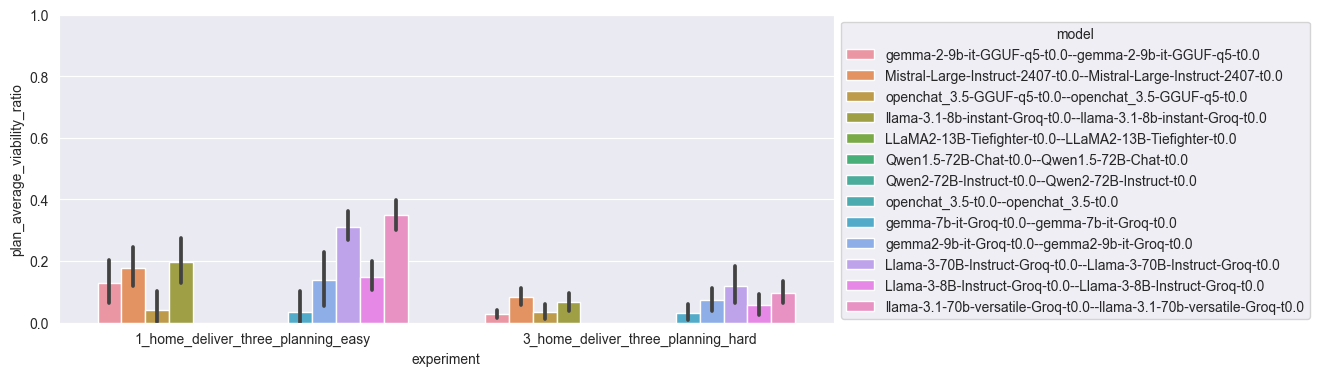

In [31]:
# change the figure size according to your needs
fig, ax = plt.subplots(figsize=(10, 4))

# choose what goes in each axis and legend according to your needs
# you can also e.g. swap y and hue, to get games in the legend and models in the axis
g = sns.barplot(metric_df,
                x='experiment',
                y='value',
                hue='model', 
                ax=ax)

# customize plot details according to your needs
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 1)
plt.ylabel(METRIC)

plt.show()

## Benchmark plots

Reproducing Figure 10 in the paper. As more models or games are added, sizes must be adjusted accordingly:

In [17]:
# read the clem scores
# RESULTS_PATH = Path('../results/results.csv')
RESULTS_PATH = Path('results/results.csv')
clem_df = pd.read_csv(RESULTS_PATH, index_col=0)

Horizontal bar plot with player, aborted, lost:

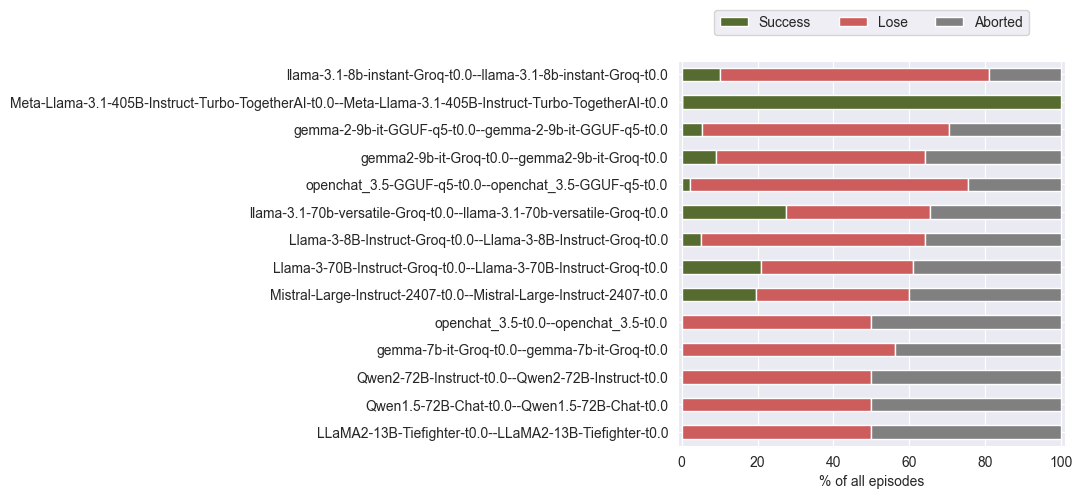

In [18]:
STACK_COLORS = ['darkolivegreen', 'indianred', 'gray']

df_aux = raw_df[raw_df.metric.isin(utils.GAMEPLAY_METRICS)]

df_aux = (df_aux.pivot(index=['game', 'model', 'experiment', 'episode'],
                       columns='metric',
                       values='value')
                .reset_index()
                .drop(columns=['game', 'experiment', 'episode'])
                .groupby('model')
                .sum()
                .sort_values(axis=1, by='metric', ascending=False))
percs = 100 * df_aux.div(df_aux.sum(axis=1), axis=0)
order = clem_df.sort_values(by='-, clemscore').index
percs = percs.reindex(order)

percs.plot(kind='barh',
           stacked=True,
           figsize=(5, 5),
           colormap=ListedColormap(STACK_COLORS))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
plt.xlabel('% of all episodes')
plt.xlim(-1, 101)
plt.ylabel('')
plt.show()

Bar plot with the sorted clemscores (they were not sorted in the paper):

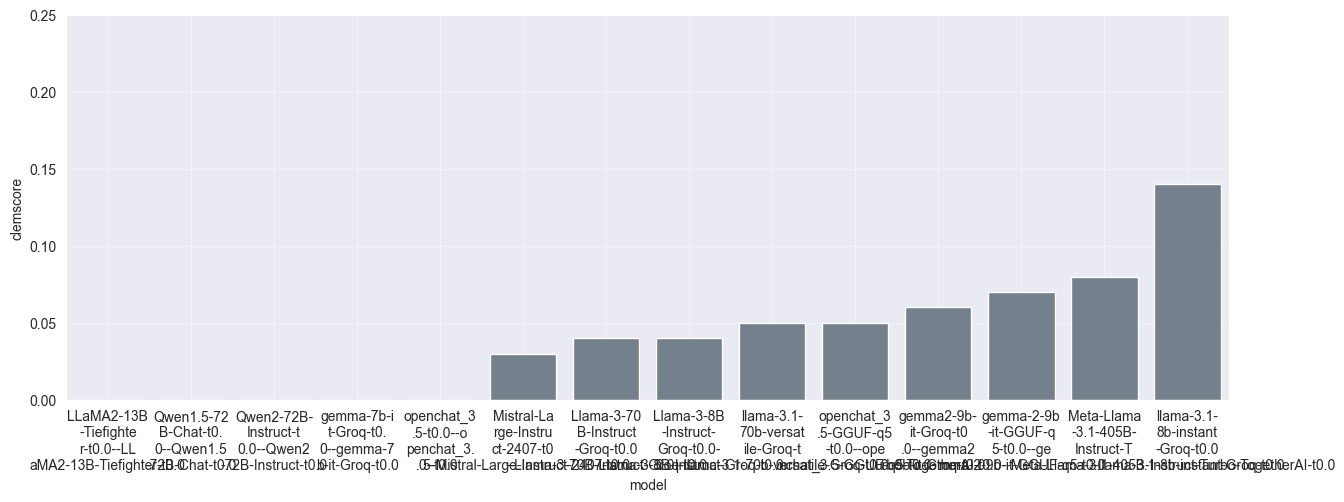

In [19]:
clem_aux = clem_df.sort_values(by='-, clemscore').reset_index(names='model')
# below is a hack to make the current names fit the plot
# ideally a dictionary with short names should be used as in the original implementation for the paper
# warning, if models have matching names up the limit, results will be wrongly merged!
clem_aux['model'] = clem_aux['model'].apply(lambda x: f'{x[:10]}\n{x[10:20]}\n{x[20:30]}\n{x[30:]}')

fig = plt.figure(figsize=(15, 5))
sns.barplot(clem_aux, x='model', y='-, clemscore', color='slategray')
# plt.ylim(-5, 105)
plt.ylim(0, 0.25)
plt.ylabel('clemscore')
plt.grid(alpha=0.5)
plt.show()

Polygons. This can get complicated if more games are added. In particular, COLUMN_ORDER must be adjusted. For more models, the number of subplots and figsize must be adjusted.

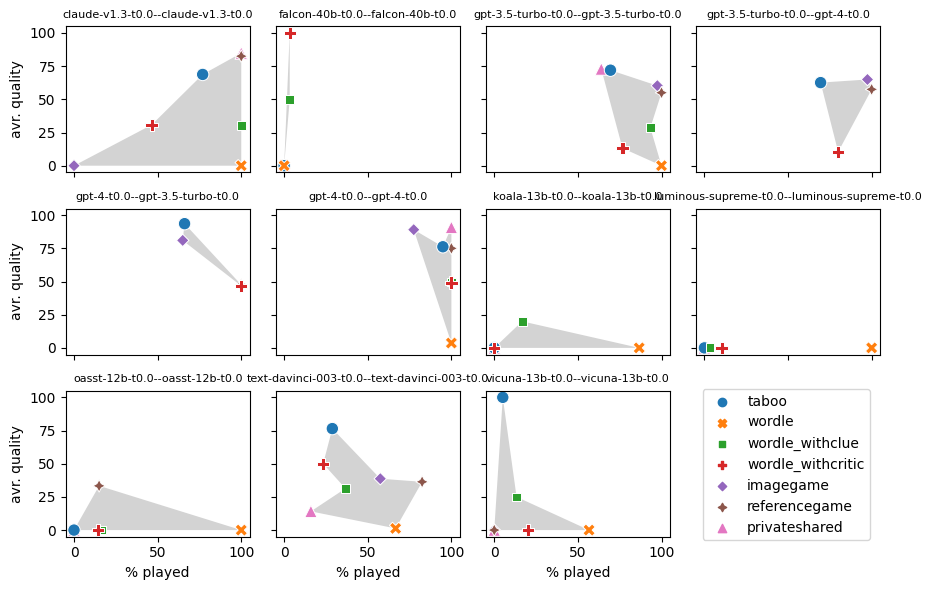

In [13]:
def ccw_sort(p):
    """Put the nodes in clockwise order."""
    # from https://stackoverflow.com/a/44143444 by user ImportanceOfBeingEarnest
    p = np.array(p)
    mean = np.mean(p, axis=0)
    d = p - mean
    s = np.arctan2(d[:, 0], d[:, 1])
    return p[np.argsort(s), :]


fig, ax_list = plt.subplots(3, 4, figsize=(9, 6), sharey=True, sharex=True)
axs = ax_list.flatten()

for n, (model, model_df) in enumerate(raw_df.groupby('model')):
    rows = model_df.metric.isin(utils.MAIN_METRICS)
    df_aux = model_df[rows]
    df_aux = (df_aux.pivot(index=['game', 'experiment', 'episode'],
                            columns='metric',
                            values='value')
                    .reset_index())
    df_aux = df_aux.drop(['episode'], axis=1)

    # create the x and y coordinates for each game
    dots = []
    for game, game_df in df_aux.groupby('game'):
        overall_means = (game_df.mean(numeric_only=True)
                                .fillna(0))
        # replace missing score by 0 when all aborted
        played = overall_means[clemmetrics.METRIC_PLAYED] * 100
        score = overall_means[clemmetrics.BENCH_SCORE]
        dots.append((game, played, score))
    labels, played, scores = zip(*dots)
    # put them in a good order for the polygon
    edges = ccw_sort(list(zip(played, scores)))

    # create the polygon and draw it
    polygon = Polygon(edges, facecolor='lightgray')
    axs[n].add_patch(polygon)

    legend = True if n == 10 else False
    g = sns.scatterplot(x=played,
                        y=scores,
                        hue=labels,
                        style=labels,
                        hue_order=utils.COLUMN_ORDER[1:],
                        style_order=utils.COLUMN_ORDER[1:],
                        s=80,
                        ax=axs[n],
                        legend=legend)
    axs[n].set_xlim(-5, 105)
    axs[n].set_ylim(-5, 105)
    axs[n].set_ylabel('avr. quality')
    axs[n].set_xlabel('% played')
    axs[n].set_title(model, fontsize=8)

fig.legend(loc='lower right', bbox_to_anchor=(0.98, 0.08))
axs[10].legend().set_visible(False)
fig.delaxes(axs[11])
plt.tight_layout()
plt.show()